In [1]:
#import everything necessary for eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../helpers/')

from data import Database
from utils import Helpers

In [2]:
db = Database(host="localhost", database="telecom", user="postgres", password="heisenberg")
df = db.read_table_to_dataframe('xdr_data')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,7.349883e+18,4/23/2019 13:56,642.0,4/25/2019 2:06,53.0,130220.0,2.082003e+14,3.368112e+10,3.572961e+13,T10006B,...,21500768.0,12101768.0,12226975.0,16511157.0,340225685.0,6951608.0,483022848.0,13524725.0,50864502.0,388912579.0
1,1.311448e+19,4/23/2019 14:00,501.0,4/24/2019 23:17,453.0,119804.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,7277265.0,14808877.0,5404356.0,17848389.0,281827903.0,3255023.0,746150700.0,1475289.0,38549811.0,305633791.0
2,1.311448e+19,4/23/2019 14:00,507.0,4/24/2019 23:17,453.0,119781.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,10232699.0,8551438.0,8528398.0,19632728.0,73444975.0,8167950.0,787793727.0,10773216.0,49161715.0,105009018.0
3,1.311448e+19,4/23/2019 14:00,744.0,4/25/2019 0:24,330.0,123787.0,2.082017e+14,3.362404e+10,8.629340e+13,D21059A,...,15007252.0,16673992.0,14089357.0,6924105.0,174894914.0,41507.0,345556220.0,837674.0,28422142.0,209975300.0
4,1.311448e+19,4/23/2019 14:01,369.0,4/25/2019 4:13,905.0,137523.0,2.082017e+14,3.366612e+10,3.538111e+13,D42243B,...,9633967.0,17836471.0,22432445.0,11400.0,623985913.0,10539036.0,706817241.0,11317378.0,43951635.0,661274286.0


In [3]:
#for all the missing values, if they are float, replace the missing values with the mean of the column's values

for column in df.columns:
    if df[column].dtype == 'float64' and df[column].isnull().any():
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)


In [9]:
df.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

Alright we got 0 missing values 


In [13]:
correlation_matrix_UL = df[['Google UL (Bytes)', 'Social Media UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)']].corr()

correlation_matrix_DL = df[['Google DL (Bytes)', 'Social Media DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)']].corr()


# app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
#                'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
#                'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
#                'Other DL (Bytes)', 'Other UL (Bytes)']

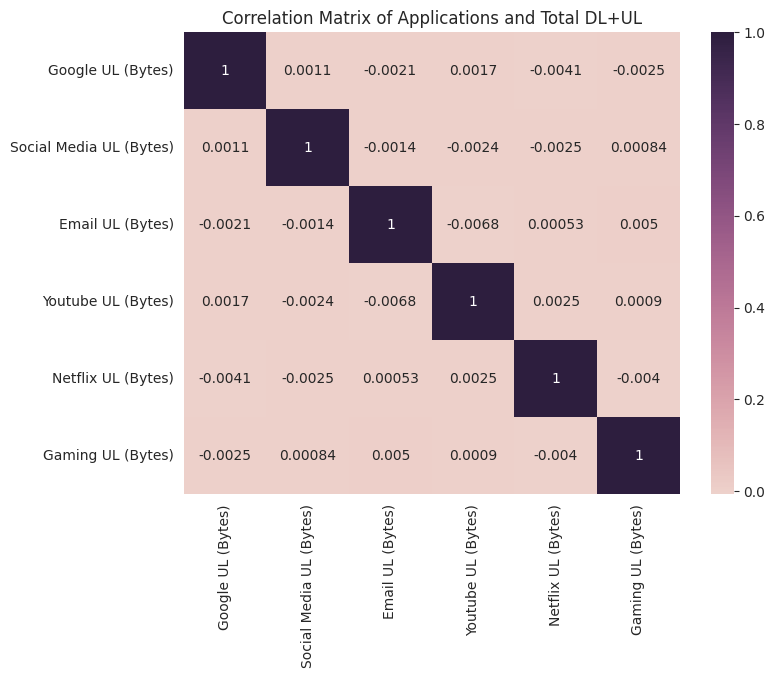

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_UL, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),)
plt.title('Correlation Matrix of Applications and Total DL+UL')
plt.show()

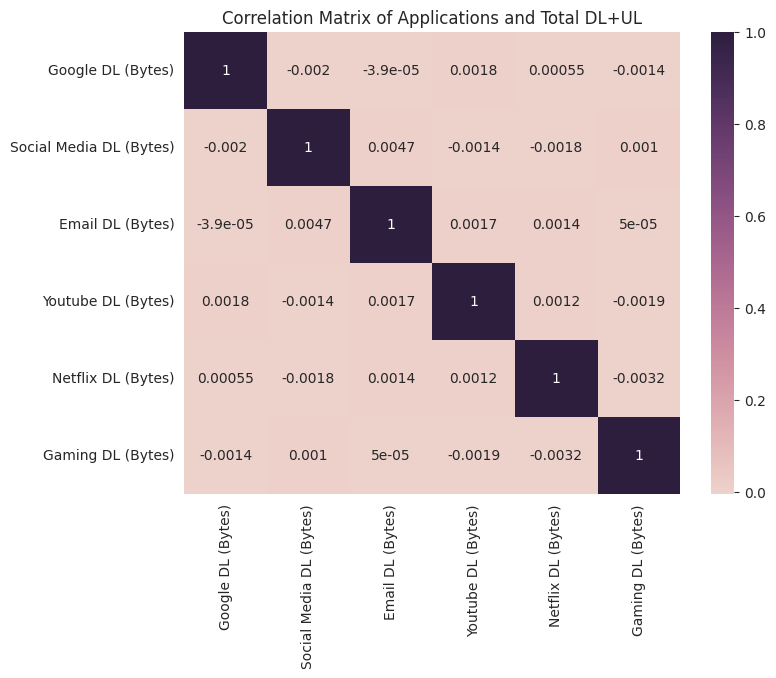

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_DL, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),)
plt.title('Correlation Matrix of Applications and Total DL+UL')
plt.show()